## **Set Up: Group M: Mastercard Inc.**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kurtosis, skew, jarque_bera
import statsmodels.api as sm
from pandas_datareader import data as pdr
import getFamaFrench_factors as gff
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import bds

## **QUESTION 2: Stylised facts and frequency**

In [3]:
# 1. Load the MASTERCARD data
ticker = 'MA'
start_date = '2022-10-09'
end_date = '2024-10-03'

In [4]:
# 2. Import the daily data and the hourly data for the last 2 years
MA_daily_data = yf.download(ticker, start = start_date, end = end_date, interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
# 3. Daily Adj Close Log returns
MA_daily_data['Log_returns'] = np.log(MA_daily_data['Adj Close'] / MA_daily_data['Adj Close'].shift(1))

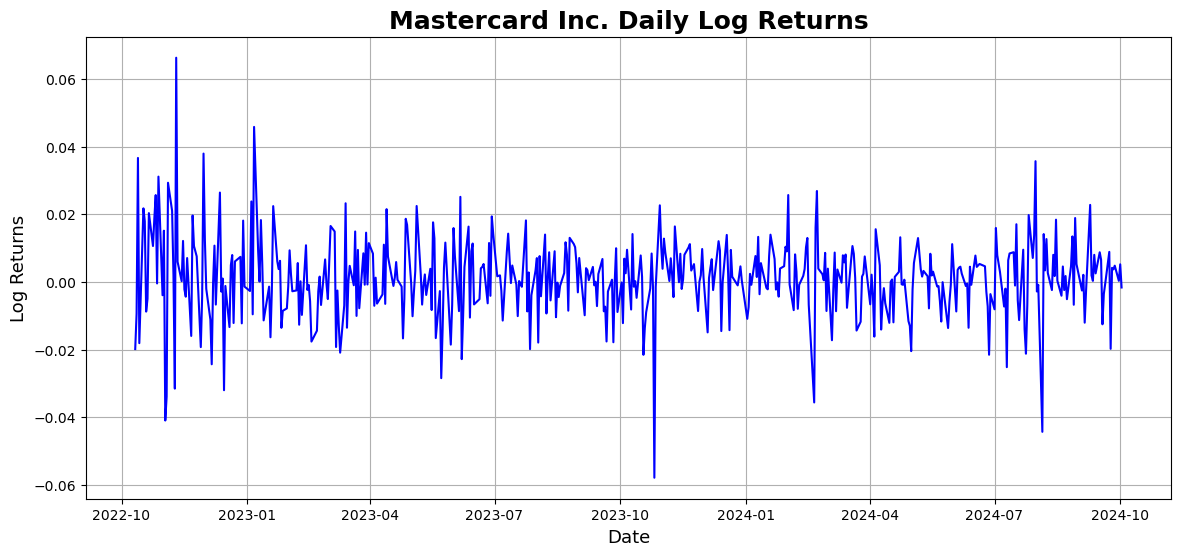

In [6]:
# 4. Plot daily log-returns
plt.figure(figsize=(14, 6))
plt.plot(MA_daily_data.index, MA_daily_data['Log_returns'], label='Daily Log Returns', color='blue')
plt.title('Mastercard Inc. Daily Log Returns', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Log Returns', fontsize=13)
plt.grid(True)
plt.show()

In [7]:
#5. Descriptive Stats for daily log-returns
descriptive_stats_daily = MA_daily_data['Log_returns'].describe()
skewness_daily = skew(MA_daily_data['Log_returns'].dropna())
kurt_daily = kurtosis(MA_daily_data['Log_returns'].dropna())
print("Descriptive Statistics (Daily):\n", descriptive_stats_daily)
print(f"Skewness (Daily): {skewness_daily}")
print(f"Kurtosis (Daily): {kurt_daily}")

Descriptive Statistics (Daily):
 count    497.000000
mean       0.001087
std        0.011904
min       -0.057867
25%       -0.005086
50%        0.001220
75%        0.007833
max        0.066281
Name: Log_returns, dtype: float64
Skewness (Daily): -0.009118472823115458
Kurtosis (Daily): 3.7597900169772975


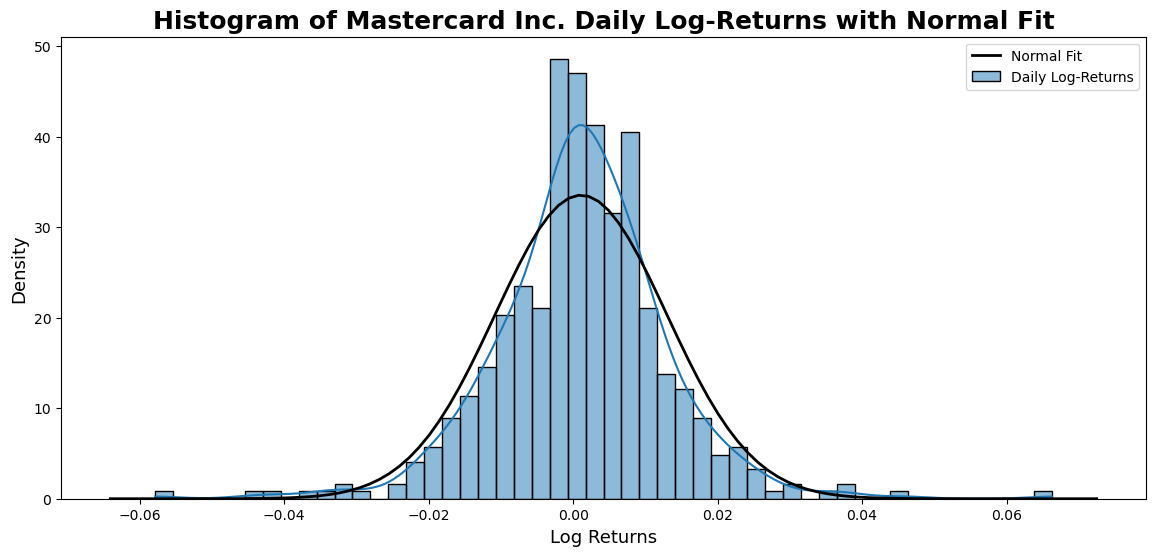

In [8]:
# 6. Plot Daily Log-returns histogram with fitted normal distribution
plt.figure(figsize=(14, 6))
sns.histplot(MA_daily_data['Log_returns'].dropna(), bins=50, kde=True, stat='density', label='Daily Log-Returns')
mu, std = norm.fit(MA_daily_data['Log_returns'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')
plt.title(f'Histogram of Mastercard Inc. Daily Log-Returns with Normal Fit',fontsize=18, fontweight='bold')
plt.xlabel('Log Returns', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend()
plt.show()

In [9]:
#7.Downloading hourly MA data from YF
MA_hourly_data = yf.download(['MA'],period='max',interval='60m')
MA_hourly_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-27 09:30:00,316.179993,322.005005,314.059998,320.950012,320.950012,1145619
2022-10-27 10:30:00,321.190002,323.079987,316.700012,318.845001,318.845001,511335
2022-10-27 11:30:00,318.665009,318.679993,316.230011,316.730011,316.730011,322432
2022-10-27 12:30:00,316.695007,318.869995,316.640015,318.239990,318.239990,376548
2022-10-27 13:30:00,318.149994,318.239990,316.920013,317.459991,317.459991,217642
...,...,...,...,...,...,...
2024-10-25 11:30:00,508.450012,508.869995,506.500000,508.815002,508.815002,124641
2024-10-25 12:30:00,508.890015,508.975006,506.179993,506.714996,506.714996,123092
2024-10-25 13:30:00,506.739990,506.820007,505.619995,506.589996,506.589996,158430


In [10]:
#8. Hourly Adj Close Log returns
MA_hourly_data['Log_returns'] = np.log(MA_hourly_data['Adj Close'] / MA_hourly_data['Adj Close'].shift(1))
print(MA_hourly_data.head())

                           Open        High         Low       Close  \
Datetime                                                              
2022-10-27 09:30:00  316.179993  322.005005  314.059998  320.950012   
2022-10-27 10:30:00  321.190002  323.079987  316.700012  318.845001   
2022-10-27 11:30:00  318.665009  318.679993  316.230011  316.730011   
2022-10-27 12:30:00  316.695007  318.869995  316.640015  318.239990   
2022-10-27 13:30:00  318.149994  318.239990  316.920013  317.459991   

                      Adj Close   Volume  Log_returns  
Datetime                                               
2022-10-27 09:30:00  320.950012  1145619          NaN  
2022-10-27 10:30:00  318.845001   511335    -0.006580  
2022-10-27 11:30:00  316.730011   322432    -0.006655  
2022-10-27 12:30:00  318.239990   376548     0.004756  
2022-10-27 13:30:00  317.459991   217642    -0.002454  


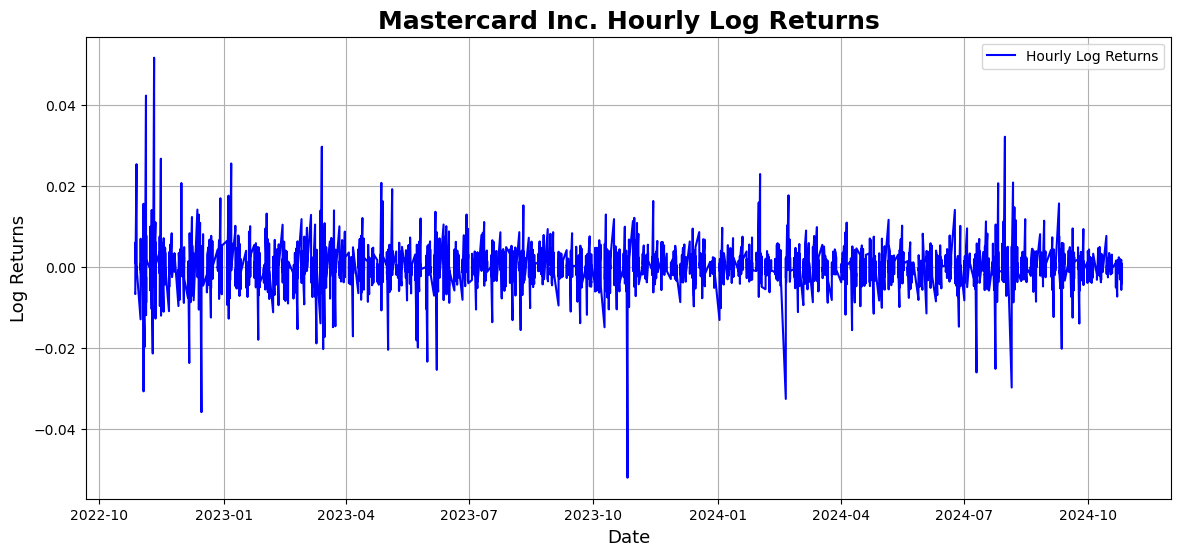

In [11]:
# 9. Plot Hourly Log Returns
plt.figure(figsize=(14, 6))
plt.plot(MA_hourly_data.index, MA_hourly_data['Log_returns'], label='Hourly Log Returns', color='blue')
plt.title('Mastercard Inc. Hourly Log Returns', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Log Returns', fontsize=13)
plt.legend()
plt.grid()
plt.show()


In [12]:
#10. Descriptive Stats for Hourly log-returns
descriptive_stats_hourly = MA_hourly_data['Log_returns'].describe()
skewness_hourly = skew(MA_hourly_data['Log_returns'].dropna())
kurt_hourly = kurtosis(MA_hourly_data['Log_returns'].dropna())
print("Descriptive Statistics (Hourly):\n", descriptive_stats_hourly)
print(f"Skewness (Hourly): {skewness_hourly}")
print(f"Kurtosis (Hourly): {kurt_hourly}")

Descriptive Statistics (Hourly):
 count    3497.000000
mean        0.000131
std         0.004570
min        -0.052060
25%        -0.001713
50%         0.000193
75%         0.002050
max         0.051768
Name: Log_returns, dtype: float64
Skewness (Hourly): -0.1162807990388309
Kurtosis (Hourly): 19.2122775196185


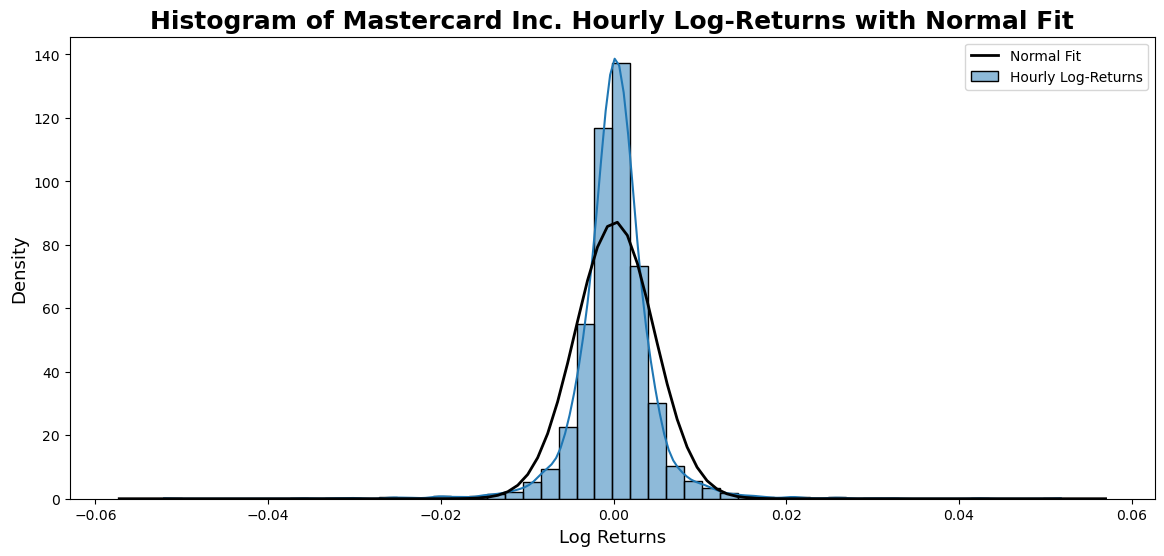

In [13]:
# 11. Plot Hourly Log-returns histogram with fitted normal distribution
hourly_log_returns = MA_hourly_data['Log_returns'].dropna()
plt.figure(figsize=(14, 6))
sns.histplot(hourly_log_returns, bins=50, kde=True, stat='density', label='Hourly Log-Returns')
mu, std = norm.fit(hourly_log_returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')
plt.title('Histogram of Mastercard Inc. Hourly Log-Returns with Normal Fit', fontsize=18,fontweight='bold' )
plt.xlabel('Log Returns', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend()
plt.show()

## **QUESTION 3:  Data matching and verification.**

In [15]:
#Loading Daily Series for max period available; transformed to simple returns
MA_daily_data_max = yf.download(ticker, period='max', interval='1d')
MA_daily_data_max['Simple_returns'] = MA_daily_data_max['Adj Close'].pct_change() * 100
print(MA_daily_data_max.head())

[*********************100%***********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close     Volume  Simple_returns
Date                                                                        
2006-05-25  4.030  4.605  4.020  4.600   4.204172  395343000             NaN
2006-05-26  4.630  4.674  4.411  4.493   4.106380  103044000       -2.326074
2006-05-30  4.497  4.498  4.285  4.400   4.021382   49898000       -2.069893
2006-05-31  4.435  4.536  4.435  4.494   4.107294   30002000        2.136374
2006-06-01  4.493  4.810  4.490  4.751   4.342178   62344000        5.718723


In [16]:
#Daily Series
sp500_ticker = '^GSPC'
t_bill_ticker = '^IRX'

In [17]:
sp500_data = yf.download(sp500_ticker, period='max', interval='1d')
t_bill_data = yf.download(t_bill_ticker, period='max', interval='1d')
sp500_data['Simple_returns'] = sp500_data['Adj Close'].pct_change() * 100
print("S&P 500 Data:\n", sp500_data.head())
print("\n13-week T-Bill Data:\n", t_bill_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

S&P 500 Data:
                  Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0   
1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0   
1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0   
1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999       0   
1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000       0   

            Simple_returns  
Date                        
1927-12-30             NaN  
1928-01-03        0.566254  
1928-01-04       -0.225230  
1928-01-05       -0.959368  
1928-01-06        0.626784  

13-week T-Bill Data:
             Open  High   Low  Close  Adj Close  Volume
Date                                                  
1960-01-04  4.52  4.52  4.52   4.52       4.52       0
1960-01-05  4.55  4.55  4.55   4.55       4.55       0

In [18]:
!pip install getFamaFrenchFactors
from getFamaFrench_factors import famaFrench5Factor
ff_factors = famaFrench5Factor(frequency='m')
print(ff_factors.head())

        Date  Mkt-RF     SMB     HML     RMW     CMA      RF
0 1963-07-31 -0.0039 -0.0041 -0.0097  0.0068 -0.0118  0.0027
1 1963-08-31  0.0507 -0.0080  0.0180  0.0036 -0.0035  0.0025
2 1963-09-30 -0.0157 -0.0052  0.0013 -0.0071  0.0029  0.0027
3 1963-10-31  0.0253 -0.0139 -0.0010  0.0280 -0.0201  0.0029
4 1963-11-30 -0.0085 -0.0088  0.0175 -0.0051  0.0224  0.0027


In [19]:
# Check the date range of the Fama-French factors
ff_factors.index = pd.date_range(start='1963-07-01', periods=len(ff_factors), freq='ME')
print("Updated Fama-French factors date range:", ff_factors.index.min(), "to", ff_factors.index.max())

# Check the date range of S&P 500 and T-bill data
print("S&P 500 date range:", sp500_data.index.min(), "to", sp500_data.index.max())
print("T-bill date range:", t_bill_data.index.min(), "to", t_bill_data.index.max())

Updated Fama-French factors date range: 1963-07-31 00:00:00 to 2024-08-31 00:00:00
S&P 500 date range: 1927-12-30 00:00:00 to 2024-10-25 00:00:00
T-bill date range: 1960-01-04 00:00:00 to 2024-10-25 00:00:00


In [20]:
# Trim data to the common date range (matching S&P 500, T-bill, and Fama-French factors)
common_start_date = max(sp500_data.index.min(), t_bill_data.index.min(), ff_factors.index.min())
common_end_date = min(sp500_data.index.max(), t_bill_data.index.max(), ff_factors.index.max())

sp500_trimmed = sp500_data[common_start_date:common_end_date]
t_bill_trimmed = t_bill_data[common_start_date:common_end_date]
ff_factors_trimmed = ff_factors[common_start_date:common_end_date]

print(sp500_trimmed)
print(t_bill_trimmed)
print(ff_factors_trimmed)


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1963-07-31     0.000000    69.830002    68.910004    69.129997    69.129997   
1963-08-01     0.000000    69.470001    68.639999    69.070000    69.070000   
1963-08-02     0.000000    69.559998    68.860001    69.300003    69.300003   
1963-08-05     0.000000    69.970001    69.199997    69.709999    69.709999   
1963-08-06     0.000000    70.400002    69.570000    70.169998    70.169998   
...                 ...          ...          ...          ...          ...   
2024-08-26  5639.660156  5651.620117  5602.339844  5616.839844  5616.839844   
2024-08-27  5602.890137  5631.180176  5593.479980  5625.799805  5625.799805   
2024-08-28  5624.509766  5627.029785  5560.950195  5592.180176  5592.180176   
2024-08-29  5607.299805  5646.950195  5583.709961  5591.959961  5591.959961   
2024-08-30  5612.740234  5651.370117  5581.790039  5

In [21]:
# Merge the datasets into one DataFrame
merged_data = pd.DataFrame({
    'SP500_Returns': sp500_trimmed['Simple_returns'],
    'T_Bill_Rate': t_bill_trimmed['Adj Close']
})

merged_data = merged_data.join(ff_factors_trimmed, how='inner')

# Drop any rows with missing values to ensure data consistency
merged_data.dropna(inplace=True)

print("Merged Data:\n", merged_data.head())

Merged Data:
             SP500_Returns  T_Bill_Rate       Date  Mkt-RF     SMB     HML  \
1963-07-31      -0.158869         3.27 1963-07-31 -0.0039 -0.0041 -0.0097   
1963-09-30      -0.596146         3.37 1963-09-30 -0.0157 -0.0052  0.0013   
1963-10-31       0.284552         3.48 1963-10-31  0.0253 -0.0139 -0.0010   
1963-12-31       0.616952         3.51 1963-12-31  0.0183 -0.0210 -0.0002   
1964-01-31       0.443291         3.50 1964-01-31  0.0224  0.0013  0.0148   

               RMW     CMA      RF  
1963-07-31  0.0068 -0.0118  0.0027  
1963-09-30 -0.0071  0.0029  0.0027  
1963-10-31  0.0280 -0.0201  0.0029  
1963-12-31  0.0003 -0.0007  0.0029  
1964-01-31  0.0017  0.0147  0.0030  


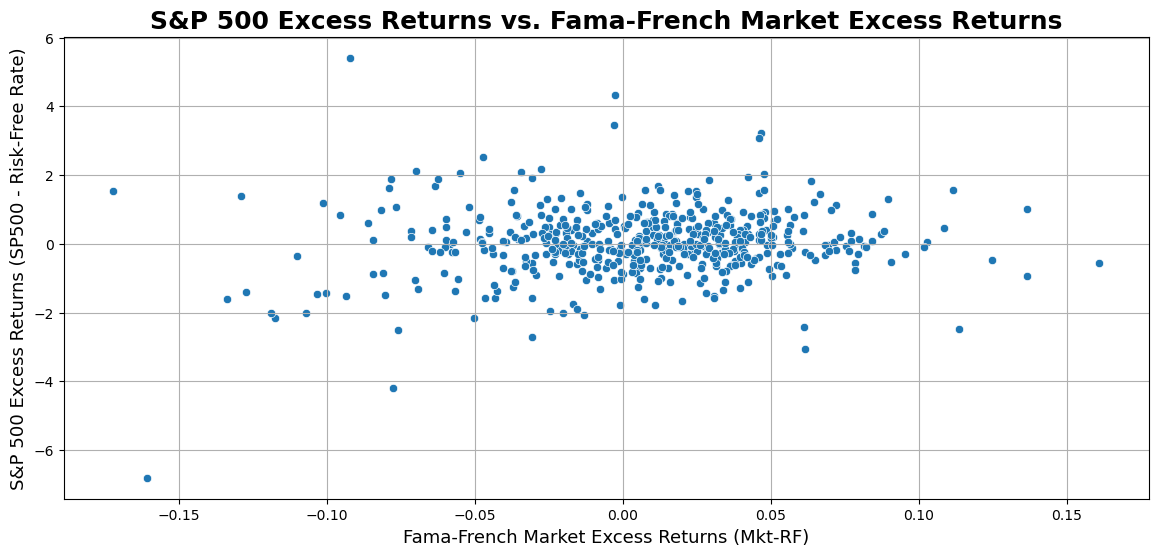

Correlation between S&P 500 excess returns and FF Market excess returns: 0.1097


In [22]:
#Part a) Compute S&P 500 excess returns using the RF from Fama-French factors
merged_data['SP500_Excess_Returns'] = merged_data['SP500_Returns'] - merged_data['RF']
plt.figure(figsize=(14, 6))
sns.scatterplot(x=merged_data['Mkt-RF'], y=merged_data['SP500_Excess_Returns'])
plt.title("S&P 500 Excess Returns vs. Fama-French Market Excess Returns", fontsize=18, fontweight='bold')
plt.xlabel("Fama-French Market Excess Returns (Mkt-RF)", fontsize=13)
plt.ylabel("S&P 500 Excess Returns (SP500 - Risk-Free Rate)",fontsize=13)
plt.grid(True)
plt.show()


correlation = merged_data[['Mkt-RF', 'SP500_Excess_Returns']].corr().iloc[0, 1]
print(f"Correlation between S&P 500 excess returns and FF Market excess returns: {correlation:.4f}")

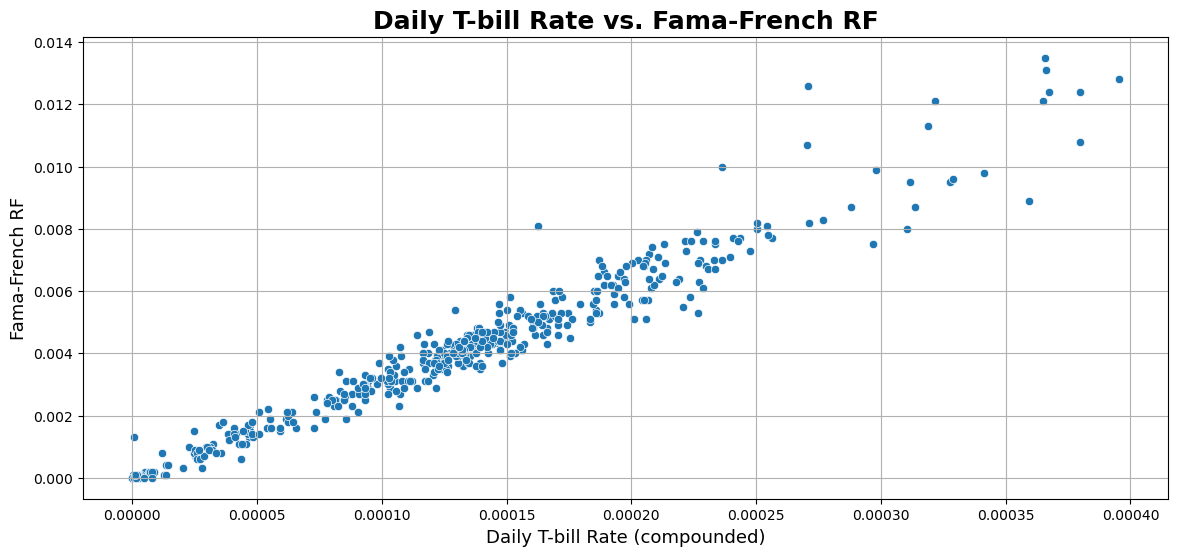

Correlation between Daily T-bill rate and Fama-French RF: 0.9798


In [23]:
#Part b)
# Convert annual T-bill rate (in %) to daily rate using compounding formula
t_bill_data['Daily_T_Bill_Rate'] = (1 + t_bill_data['Adj Close'] / 100) ** (1 / 365) - 1
# Merge T-bill data and Fama-French factors on 'Date'
merged_t_bill_rf = pd.merge(t_bill_data[['Daily_T_Bill_Rate']], ff_factors[['RF']], left_index=True, right_index=True, how='inner')

plt.figure(figsize=(14, 6))
sns.scatterplot(x=merged_t_bill_rf['Daily_T_Bill_Rate'], y=merged_t_bill_rf['RF'])
plt.title("Daily T-bill Rate vs. Fama-French RF", fontsize=18, fontweight='bold')
plt.xlabel("Daily T-bill Rate (compounded)",fontsize=13)
plt.ylabel("Fama-French RF",fontsize=13)
plt.grid(True)
plt.show()

# Correlation between T-bill daily rate and RF from Fama-French
correlation_tb_rf = merged_t_bill_rf.corr().iloc[0, 1]
print(f"Correlation between Daily T-bill rate and Fama-French RF: {correlation_tb_rf:.4f}")

## **QUESTION 4:  CAPM**  



In [25]:
#4A) Testing the Validity of CAPM and interpreting B
# Match Mastercard Inc. and FF data
MA_daily_data_max['Simple_Return'] = MA_daily_data_max['Adj Close'].pct_change() * 100
aligned_data = pd.merge(MA_daily_data_max[['Simple_Return']], ff_factors, left_index=True, right_index=True)
print(aligned_data.head())

            Simple_Return       Date  Mkt-RF     SMB     HML     RMW     CMA  \
2006-05-31       2.136374 2006-05-31 -0.0357 -0.0285  0.0241  0.0115  0.0146   
2006-06-30       0.000000 2006-06-30 -0.0035 -0.0024  0.0085  0.0132 -0.0007   
2006-07-31      -0.928728 2006-07-31 -0.0078 -0.0363  0.0260  0.0163  0.0090   
2006-08-31       1.176460 2006-08-31  0.0203  0.0044 -0.0206 -0.0186  0.0209   
2006-10-31       2.150551 2006-10-31  0.0323  0.0198 -0.0031 -0.0012  0.0028   

                RF  
2006-05-31  0.0043  
2006-06-30  0.0040  
2006-07-31  0.0040  
2006-08-31  0.0042  
2006-10-31  0.0041  


In [26]:
# Estimating CAPM Regression
X = sm.add_constant(aligned_data['Mkt-RF'])  # Adds a constant to the regression model (intercept)
Y = aligned_data['Simple_Return'] - aligned_data['RF'] #MAs excess returns
capm_model = sm.OLS(Y, X).fit(cov_type='HAC',cov_kwds={'maxlags': 5}) #Used to fit OLS with HAC var-covar estimator

# Display the results
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.03556
Date:                Sat, 26 Oct 2024   Prob (F-statistic):              0.851
Time:                        21:59:12   Log-Likelihood:                -376.42
No. Observations:                 155   AIC:                             756.8
Df Residuals:                     153   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1820      0.286      0.635      0.5

In [27]:
#Interpretation of beta
beta = capm_model.params['Mkt-RF']
print(f"Estimated beta: {beta}")

Estimated beta: 0.801450653398903


Date
1960-01-04    0.026789
1960-01-05    0.642147
1960-01-06   -0.345025
1960-01-07   -0.586438
1960-01-08   -0.255085
dtype: float64
Expected return of the replication portfolio: 0.025176306341305642
Variance of the replication portfolio: 0.6771830373039399


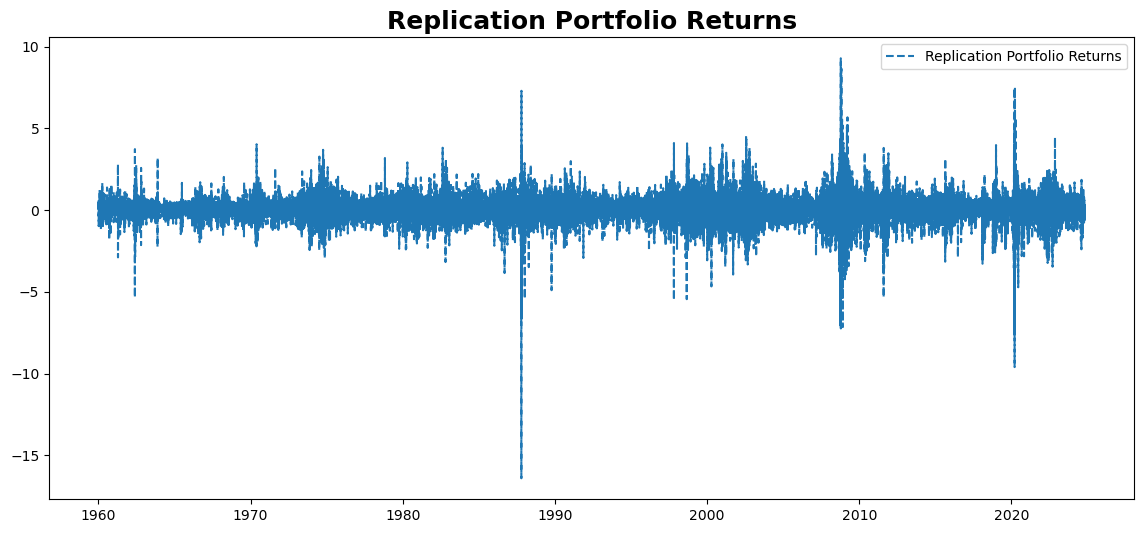

In [28]:
#Construct replicating portfolio
aligned_sp_tbill = pd.merge(sp500_data['Simple_returns'], t_bill_data['Daily_T_Bill_Rate'], left_index=True, right_index=True)
replication_portfolio = beta * aligned_sp_tbill['Simple_returns'] + (1 - beta) * aligned_sp_tbill['Daily_T_Bill_Rate']
print(replication_portfolio.head())

expected_return = replication_portfolio.mean()
portfolio_variance = replication_portfolio.var()
print(f"Expected return of the replication portfolio: {expected_return}")
print(f"Variance of the replication portfolio: {portfolio_variance}")

plt.figure(figsize=(14,6))
plt.plot(replication_portfolio, label='Replication Portfolio Returns', linestyle='--' )
plt.title('Replication Portfolio Returns',fontsize=18, fontweight='bold')
plt.legend()
plt.show()



In [29]:
# Calculate expected return and variance for the replication portfolio
expected_return_portfolio = replication_portfolio.mean()
variance_portfolio = replication_portfolio.var()
print(f"Expected return of the replication portfolio: {expected_return_portfolio}")
print(f"Variance of the replication portfolio: {variance_portfolio}")

# Calculate expected return and variance for the individual stock (Mastercard)
expected_return_share = aligned_data['Simple_Return'].mean()
variance_share = aligned_data['Simple_Return'].var()
print(f"Expected return of the individual share: {expected_return_share}")
print(f"Variance of the individual share: {variance_share}")

Expected return of the replication portfolio: 0.025176306341305642
Variance of the replication portfolio: 0.6771830373039399
Expected return of the individual share: 0.19021826172956957
Variance of the individual share: 7.5840768316098615


In [30]:
#Sharpe ratio
average_risk_free_rate = aligned_sp_tbill['Daily_T_Bill_Rate'].mean()
sharpe_ratio_portfolio = (expected_return_portfolio - average_risk_free_rate) / replication_portfolio.std()
sharpe_ratio_share = (expected_return_share - average_risk_free_rate) / aligned_data['Simple_Return'].std()

print(f"Sharpe Ratio of the replication portfolio: {sharpe_ratio_portfolio}")
print(f"Sharpe Ratio of the individual share: {sharpe_ratio_share}")

Sharpe Ratio of the replication portfolio: 0.03045359933786131
Sharpe Ratio of the individual share: 0.06902980064560829


## **QUESTION 5: APT**

In [32]:
# Part a

# Estimating and testing an APT pricing model
ff_factors = gff.famaFrench5Factor(frequency = 'd')
ff_factors.set_index('Date', inplace=True)
MA_daily_data.index = pd.to_datetime(MA_daily_data.index)
ff_factors = ff_factors.loc[start_date:end_date]

In [33]:
# Merge the data
MA_ff_data = pd.merge(MA_daily_data['Log_returns'], ff_factors, left_index=True, right_index=True)

In [34]:
# Calculating excess return of Mastercard
MA_ff_data['Excess_Return'] = MA_ff_data['Log_returns'] - MA_ff_data['RF']
MA_ff_data_clean = MA_ff_data.dropna(subset=['Excess_Return'])

# Independent + Dependent variables
X = MA_ff_data_clean[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
X = sm.add_constant(X)
y = MA_ff_data_clean['Excess_Return']

# Running the OLS regression of the 5-factor model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     92.01
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           2.80e-67
Time:                        21:59:15   Log-Likelihood:                 1582.0
No. Observations:                 473   AIC:                            -3152.
Df Residuals:                     467   BIC:                            -3127.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.918e-05      0.000      0.048      0.9

In [35]:
# Part c

# Estimating and testing an APT pricing model + Momentum
momentum_factor = gff.momentumFactor(frequency='d')
momentum_factor.set_index('Date', inplace=True)
momentum_factor = momentum_factor.loc[start_date:end_date]

In [36]:
# Merge the data
MA_ff_data = pd.merge(MA_ff_data, momentum_factor['MOM'], left_index=True, right_index=True)

In [37]:
# Dropping and replacing values
MA_ff_data.replace([np.inf, -np.inf], np.nan, inplace=True)
MA_ff_data.dropna(inplace=True)

In [38]:
# Calculating excess return
MA_ff_data['Excess_Return'] = MA_ff_data['Log_returns'] - MA_ff_data['RF']

# Independent + Dependent variables
X = MA_ff_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'MOM']]
X = sm.add_constant(X)
y = MA_ff_data['Excess_Return']

# Running the OLS regression of the 5-factor model + Momentum
model_momentum = sm.OLS(y, X).fit()

# Printing the model summary
print(model_momentum.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     78.35
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.83e-67
Time:                        21:59:18   Log-Likelihood:                 1584.8
No. Observations:                 473   AIC:                            -3156.
Df Residuals:                     466   BIC:                            -3126.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.011e-05      0.000      0.051      0.9

In [39]:
# Part D

# Downloading the oil data
oil_data = yf.download('CL=F', start=start_date, end=end_date, interval='1d')
oil_data['Oil_Returns'] = np.log(oil_data['Adj Close'] / oil_data['Adj Close'].shift(1))

[*********************100%***********************]  1 of 1 completed


In [40]:
# Merging the data
MA_ff_data = pd.merge(MA_ff_data, oil_data['Oil_Returns'], left_index=True, right_index=True)

In [41]:
# Calculating excess return
MA_ff_data['Excess_Return'] = MA_ff_data['Log_returns'] - MA_ff_data['RF']

# Independent variables for the 5-factor + momentum + oil returns model
X_oil = MA_ff_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'MOM', 'Oil_Returns']]
X_oil = sm.add_constant(X_oil)

# Running the OLS regression of the 5-factor model + Momentum + Oil Returns
model_oil = sm.OLS(y, X_oil).fit(cov_type='HAC', cov_kwds={'maxlags': 5})

# Printing the model summary
print(model_oil.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     42.95
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.09e-46
Time:                        21:59:19   Log-Likelihood:                 1585.3
No. Observations:                 473   AIC:                            -3155.
Df Residuals:                     465   BIC:                            -3121.
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.721e-05      0.000      0.102      

In [42]:
# Comparing the different types of models
print("Model 1: Fama-French 5-Factor Model\n", model.summary())
print("\nModel 2: Fama-French 5-Factor + Momentum\n", model_momentum.summary())
print("\nModel 3: Fama-French 5-Factor + Momentum + Oil Returns\n", model_oil.summary())

Model 1: Fama-French 5-Factor Model
                             OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     92.01
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           2.80e-67
Time:                        21:59:19   Log-Likelihood:                 1582.0
No. Observations:                 473   AIC:                            -3152.
Df Residuals:                     467   BIC:                            -3127.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.9

In [43]:
# Testing Multicollinearity


<Axes: >

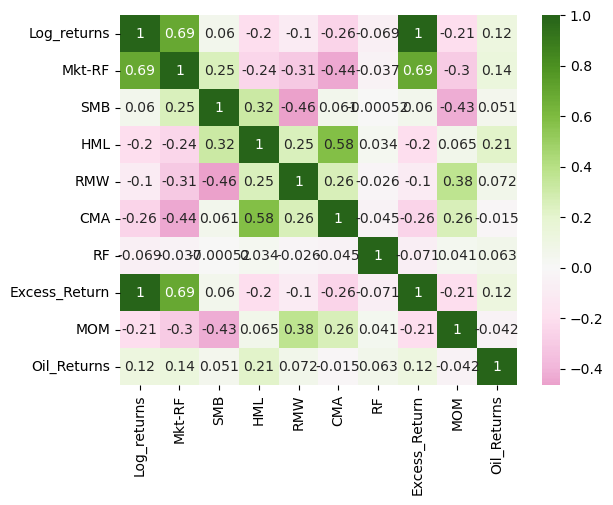

In [44]:
sns.heatmap(MA_ff_data.corr(),  cmap='PiYG', center=0, annot=True)

## **QUESTION 6: ARMA Models and Forecasting**

## **QUESTION 6: ARMA Models and Forecasting**

#Part A
ACF and PACF plots



In [50]:

df = yf.download(ticker, period='max', interval='1d')
df['Simple_returns'] = df['Adj Close'].pct_change() * 100

#Remove first row of data (NaN first value)
df = df.iloc[1:, :]


[*********************100%***********************]  1 of 1 completed


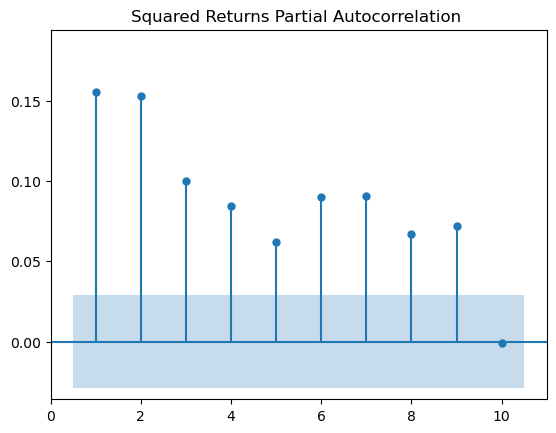

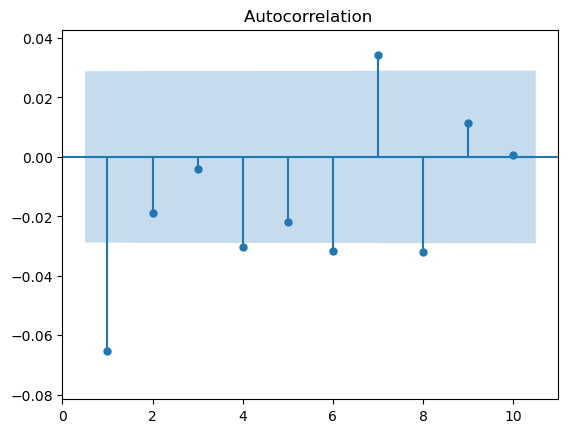

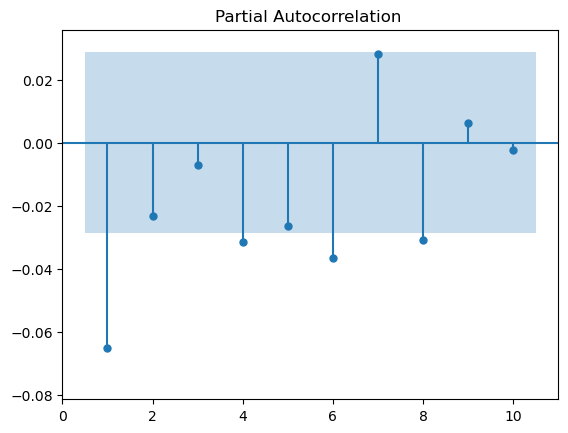

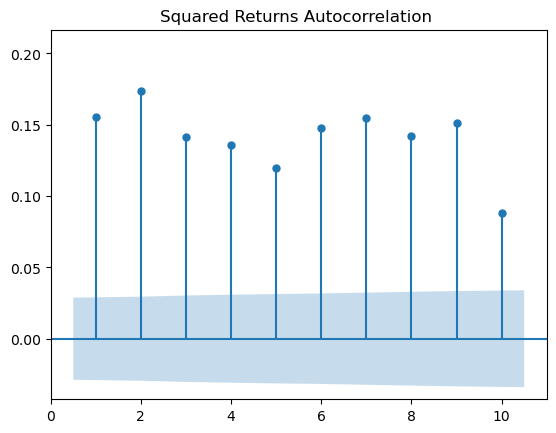

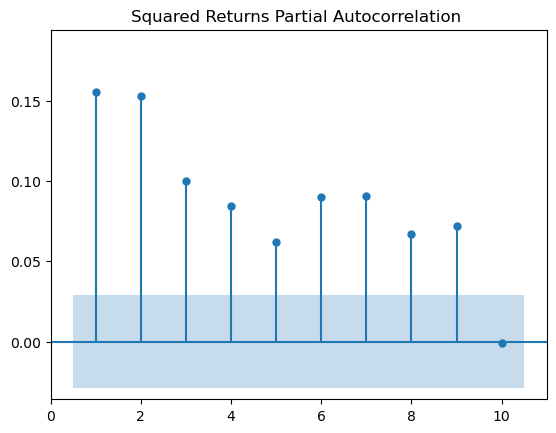

In [51]:
#Part A
#ACF and PACF plots for returns

plot_acf(df.Simple_returns, title='Autocorrelation ', lags=10, zero=False, auto_ylims = True)
plot_pacf(df.Simple_returns, title='Partial Autocorrelation ', lags=10, zero=False, auto_ylims = True)

#ACF and PACF plots for squared returns

sqdf = np.square(df.Simple_returns)
plot_acf(sqdf, title='Squared Returns Autocorrelation ', lags=10, zero=False, auto_ylims = True)
plot_pacf(sqdf, title='Squared Returns Partial Autocorrelation ', lags=10, zero=False, auto_ylims = True)


# Part B
BIC and optimal ARMA Specs


In [53]:
# model selection using AIC/BIC
from statsmodels.tsa.arima.model import ARIMA


#the command below is not stricly necessary but statsmodels would issue a warning without this, essentially you reconfirming the frequency of your data and ask to infer it
df.index = pd.DatetimeIndex(df.index,freq='infer')

#Note that we use for loop below to help us vary the orders faster
#Python uses indentation to define the scope of for loop
for p in range(0,3): #range function gives a list from 0 to 3, so that p iterates from 0 to 3 in the loop
    for q in range(0,3):
        if p==0 and q==0: #this is to check that our model has
            continue
        mod = ARIMA(df.Simple_returns, order=(p, 0, q))
        result = mod.fit()
        print(p,q,round(result.aic,2),round(result.bic,2),round(result.hqic,2))

C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0 1 19933.59 19952.91 19940.39


C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0 2 19933.58 19959.35 19942.64


C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1 0 19934.48 19953.8 19941.28


C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1 1 19927.54 19953.31 19936.61


C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1 2 19926.74 19958.95 19938.07


C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2 0 19933.97 19959.73 19943.03


C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2 1 19926.69 19958.9 19938.02


C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2 2 19928.66 19967.31 19942.26


Model AIC_____BIC_____      HQIC

(0 1) 19926.71 19946.03 19933.51 <- (absolute) best BIC

(0 2) 19926.7 19952.46 19935.76

(1 0) 19927.6 19946.93 19934.4 <- best BIC

(1 1) 19920.68 19946.44 19929.74 <- best BIC, HQIC

(1 2) 19919.87 19952.08 19931.21 <- best AIC

(2 0) 19927.09 19952.85 19936.15

(2 1) 19919.83 19952.03 19931.16 <- best AIC

(2 2) 19921.8 19960.44 19935.39

In [55]:
# estimate selected model
mod = ARIMA(df.Simple_returns, order=(0, 0, 1))
result = mod.fit()
print(result.summary())

C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\charl\OneDrive\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Simple_returns   No. Observations:                 4636
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -9963.793
Date:                Sat, 26 Oct 2024   AIC                          19933.586
Time:                        21:59:36   BIC                          19952.911
Sample:                             0   HQIC                         19940.385
                               - 4636                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1249      0.029      4.314      0.000       0.068       0.182
ma.L1         -0.0682      0.009     -7.717      0.000      -0.086      -0.051
sigma2         4.3083      0.037    115.446      0.0

# Part C
Residuals and BDS Test

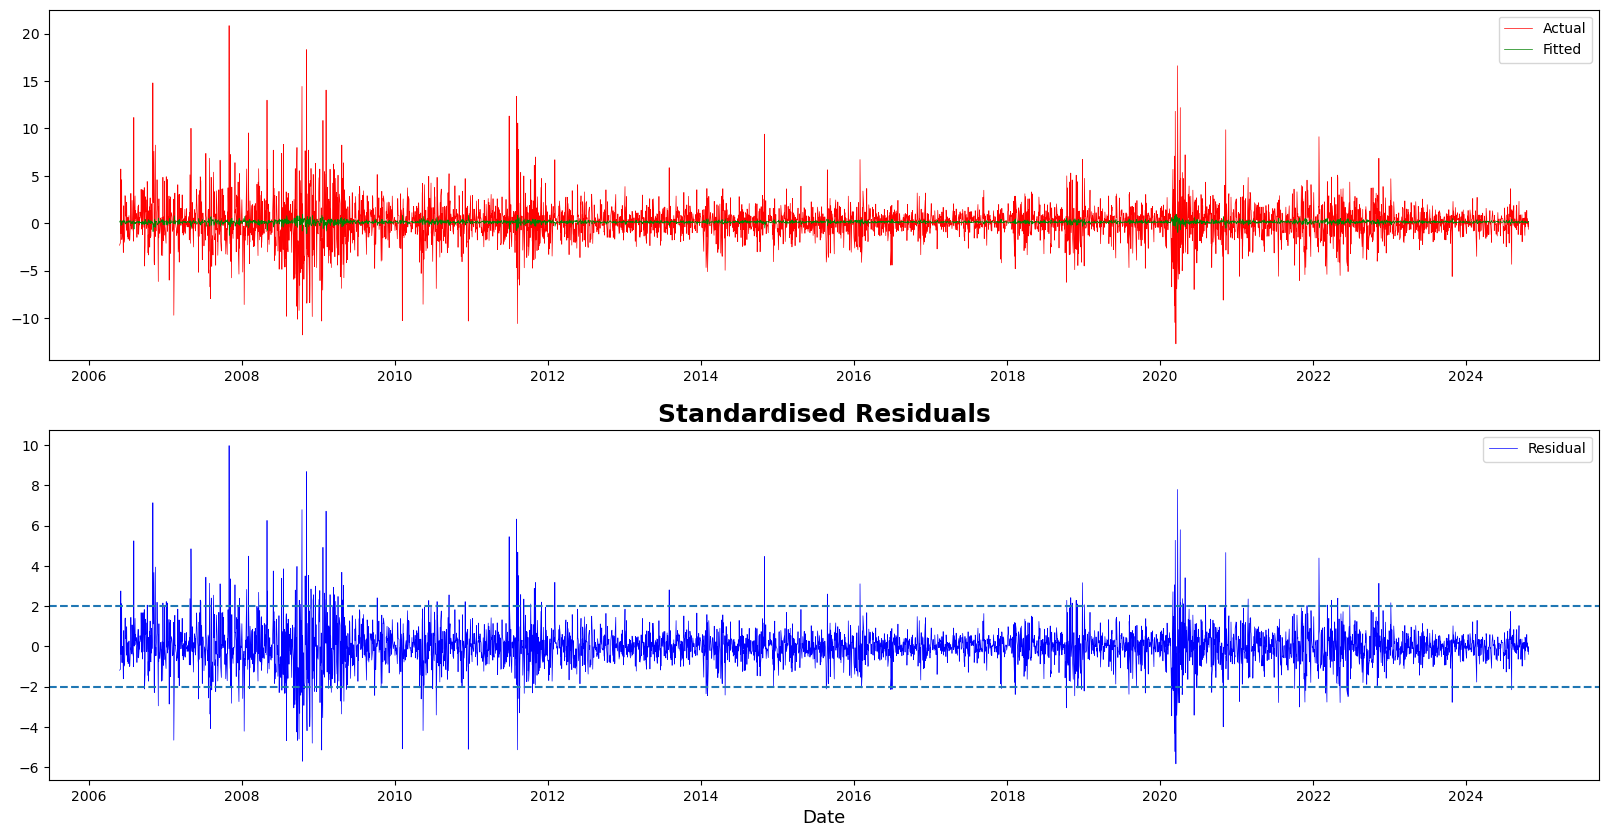

SignificanceResult(statistic=20083.93416081192, pvalue=0.0)

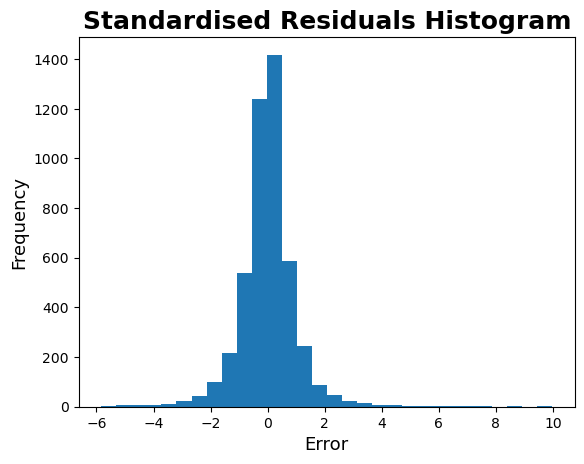

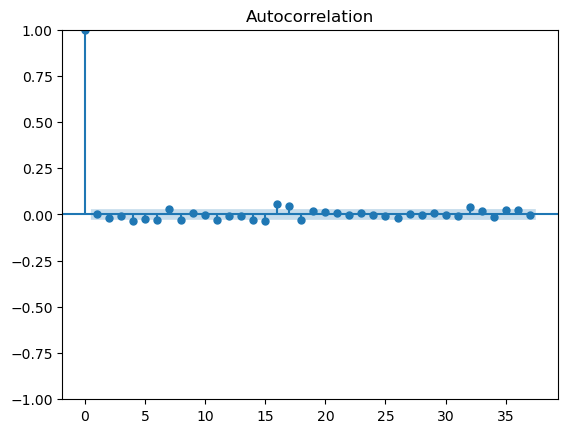

In [57]:
#Residuals plot and fitted vs actual data

# Standardised Residuals
std_resid = result.resid/result.resid.std()

# Plot of Standardised residuals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), linewidth =0.5)

ax1.plot(df.Simple_returns,color='r',label='Actual',linewidth =0.5)
ax1.plot(result.predict(),color='g',label='Fitted' ,linewidth =0.5)
ax2.plot(std_resid,color='b',label='Residual',linewidth =0.5)
ax2.axhline(y=np.mean(std_resid)-2*np.std(std_resid),linestyle='--')
ax2.axhline(y=np.mean(std_resid)+2*np.std(std_resid),linestyle='--')

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
plt.title('Standardised Residuals', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=13)


plt.show()
# Histogram of Residuals
plt.hist(std_resid,bins=30)
plt.title('Standardised Residuals Histogram', fontsize=18, fontweight='bold')
plt.xlabel('Error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
# ACF of Residuals
plot_acf(std_resid)
# Jarque Bera test
JB = jarque_bera(std_resid)
JB

In [ ]:
# BDS Test

display(bds(std_resid, max_dim=8, epsilon=None))
display(bds(std_resid, max_dim=8, epsilon=0.5))
display(bds(std_resid, max_dim=8, epsilon=0.75))
display(bds(std_resid, max_dim=8, epsilon=1))
display(bds(std_resid, max_dim=8, epsilon=0.25))
display(bds(std_resid, max_dim=8, epsilon=0.01))


(array([1.14336231, 1.74899599, 2.25556476, 2.71976089, 3.20430735,
        3.68180608, 4.19151849]),
 array([2.52888195e-01, 8.02917125e-02, 2.40979025e-02, 6.53291383e-03,
        1.35387861e-03, 2.31587534e-04, 2.77093595e-05]))

(array([ 3.98421161,  6.15880837,  8.94167682, 12.34766449, 16.98361189,
        23.17318723, 31.80396867]),
 array([6.77045225e-005, 7.32943510e-010, 3.83309177e-019, 5.01461263e-035,
        1.08592482e-064, 8.48824261e-119, 5.70481382e-222]))

# Part D
Long run forecast (1000 periods or more) and comparison to uncondtional mean

In [ ]:
# Forecast for 1000 intervals ahead:
pred=result.get_prediction(start= len(df),end= len(df)+1000)

# Setting Date as index for forecast values:
fc = pd.DataFrame(pred.predicted_mean)
fc.insert(1,"Date", pd.date_range(start=df.index[len(df)-1], periods=1001))
fc=fc.set_index('Date')

# Creating confidence intervals at  95%
for i in [5]:
    signif=1./i
    CI=pred.conf_int(alpha=signif) # CI=1-signif

# Setting Date as Index for Confidence Intervals
CI.insert(1,"Date", pd.date_range(start=df.index[len(df)-1], periods=1001))
CI=CI.set_index('Date')


In [ ]:
# Plot of last 500 days of data and forecast 1000 days into future:
plt.figure(figsize = (10, 5))
plt.plot(df.Simple_returns[len(df)-500:],color='b', label = 'Actual', linewidth=0.8)
plt.plot(fc,color='r', label = 'Actual')
plt.grid()
plt.title('1000 Period Forecasted Simple Daily Returns ', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns (%)', fontsize=13)
plt.fill_between(CI.index,CI.iloc[:,0],CI.iloc[:,1], color='blue',alpha=0.3)

In [ ]:
# Plot of last 10 days of data and forecast 10 days into future:
plt.figure(figsize = (5, 5))
plt.plot(df.Simple_returns[len(df)-10:],color='b', label = 'Actual')
plt.rc('xtick', labelsize=8)
plt.plot(fc[:10],color='r', label = 'Actual')
plt.grid()
plt.title('10 Period Forecast', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns (%)', fontsize=13)
plt.fill_between(CI.index[:10],CI.iloc[:10,0],CI.iloc[:10,1], color='blue',alpha=0.3)

In [ ]:
# Plot of last all days of data and forecast 1000 days into future:
plt.figure(figsize = (20, 5))
plt.plot(df.Simple_returns,color='b', label = 'Actual', linewidth = 0.8)
plt.plot(fc,color='r', label = 'Actual')
plt.grid()
plt.fill_between(CI.index,CI.iloc[:,0],CI.iloc[:,1], color='blue',alpha=0.3)

In [ ]:
# Unconditional mean vs 1000th forecast

# Unconditional Mean
print('Mean = ', (sum(df.Simple_returns)/len(df)))

# 1000th forecast
print("1000th forecast = ", fc.predicted_mean[1000])



# Part E
Test (previous 100 obs) and Training data forecast comparisons, find RMSE and plot 95% CI's

In [ ]:
# Estimate model on training series

# Remove most recent 100 obseravtions
df1 = df.iloc[1:(len(df)-100), :]

# 0,0,1 Model applied to training data
mod1 = ARIMA(df1.Simple_returns, order=(0, 0, 1))
res1 = mod1.fit()
print(res1.summary())




In [ ]:
#Create list of previous 100 dates for forecasts
forecast_dates=df.index[len(df)-100:len(df)]
#forecast_dates

In [ ]:
# Dynamic forecast (conditioning on the last observation 100 days ago)
Simple_returns_dynamic = res1.get_prediction(start=(len(df)-99),end=len(df))
Simple_returns_dynamic_mean = Simple_returns_dynamic.predicted_mean
Simple_returns_dynamic_CI = Simple_returns_dynamic.conf_int(alpha=0.05)

# Making the index of both series the forecast dates:
SR_dynamic_mean = pd.DataFrame(Simple_returns_dynamic_mean)
SR_dynamic_mean.insert(1,"Date", forecast_dates)
SR_dynamic_mean=SR_dynamic_mean.set_index('Date')

SR_dynamic_CI = pd.DataFrame(Simple_returns_dynamic_CI)
SR_dynamic_CI.insert(1,"Date", forecast_dates)
SR_dynamic_CI=SR_dynamic_CI.set_index('Date')

In [ ]:
# Plot of actual vs forecasted
plt.figure(figsize = (10, 5))
plt.plot(df.Simple_returns[(len(df)-100):],color='r', label = 'Actual')
plt.plot(SR_dynamic_mean,color='b', label = 'Dynamic forecast')
plt.plot(SR_dynamic_CI,color='b',linestyle='--')
plt.legend(loc = 'lower right')

In [ ]:
# Finding RMSE

MSE = ((np.array(SR_dynamic_mean) - np.array(df.Simple_returns[(len(df)-100):])) ** 2).mean()
RMSE = np.sqrt(MSE)
print(RMSE)

# Part F

Compare ARMA forecast with forecast from normal white noise (with parameters set to sample estimates) using RMSE.

In [ ]:
# Generating white noise series
mean = sum((df.Simple_returns)/len(df))
std = np.std(df.Simple_returns)
num_samples = 100
sample = np.random.normal(mean, std, size=num_samples)

In [ ]:
# Comparing plot of actual, forecast and white noise

# Making the index of white_noise the forecast dates:
white_noise = pd.DataFrame(sample)
white_noise.insert(1,"Date", forecast_dates)
white_noise=white_noise.set_index('Date')

# Plot
plt.figure(figsize = (15, 5))
plt.plot(white_noise, color='y', label = 'White Noise')
plt.plot(df.Simple_returns[(len(df)-100):],color='r', label = 'Actual')
plt.plot(SR_dynamic_mean,color='b', label = 'Dynamic forecast')
plt.plot(SR_dynamic_CI,color='b',linestyle='--', label = '95% CI')
plt.title('Simple Daily Returns Forecast v Actual v White Noise', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns (%)', fontsize=13)
plt.legend(loc = 'lower right')


In [ ]:
# Comparing RMSE of White Noise and ARMA forecast

# Finding RMSE of White Noise
wnMSE = ((np.array(white_noise) - np.array(df.Simple_returns[(len(df)-100):])) ** 2).mean()
wnRMSE = np.sqrt(wnMSE)

print('White Noise RMSE =', wnRMSE)
print('Forecast RMSE =', RMSE)


